<a href="https://colab.research.google.com/github/KritPrasad05/Primetrade.ai._Internship_Task/blob/main/Primetrade_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import requests
from pathlib import Path
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import json
import ast

# Creating folder to store data

In [ ]:
data_dir = Path("./Data")
trade_csv = data_dir/"trade.csv"

if data_dir.is_dir():
  print(f"{data_dir} path already exist!!")
else:
  print(f"{data_dir} path doesn't exist, creating the {data_dir} path......")
  Path.mkdir(data_dir)
  print(f"{data_dir} path created!!!!")

Data path already exist!!


#Downloading data from Google Drive

In [ ]:
with open(trade_csv,"wb") as f:
  response = requests.get("https://drive.google.com/uc?export=download&id=1E3T8i1akfm6NnT42AWEE6U1t7uvwreYK")
  f.write(response.content)

trade_df = pd.read_csv(trade_csv)
trade_df.head()

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."


In [ ]:
trade_df.head(1)

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."


#Formating The Data into meaning full Data

##Parsing the json data and converting it to dataframe formate

In [ ]:
def parse_trade_history(trade_data):
    """Convert stringified trade history into a proper list of dictionaries."""
    try:
        if isinstance(trade_data, list):
            return trade_data  # Already a list, no need to parse
        elif isinstance(trade_data, str):
            # Replace single quotes with double quotes
            trade_data = trade_data.replace("'", '"')
            # Convert Python-style booleans and None to JSON format
            trade_data = trade_data.replace("True", "true").replace("False", "false").replace("None", "null")
            return json.loads(trade_data)  # Parse as JSON
        else:
            return None  # If unknown format, return None
    except json.JSONDecodeError as e:
        print("Error parsing trade history:", e)
        return None  # Handle parsing errors gracefully

In [ ]:
# Apply the function to the Trade_History column
trade_df['Trade_History'] = trade_df['Trade_History'].apply(parse_trade_history)

In [ ]:
# Explode the trade history into separate rows
df_exploded = trade_df.explode("Trade_History").reset_index(drop=True)
df_exploded.head()

,Port_IDs,Trade_History
0,3925368433214965504,"{'time': 1718899656000, 'symbol': 'SOLUSDT', '..."
1,3925368433214965504,"{'time': 1718899618000, 'symbol': 'DOGEUSDT', ..."
2,3925368433214965504,"{'time': 1718899618000, 'symbol': 'DOGEUSDT', ..."
3,3925368433214965504,"{'time': 1718899616000, 'symbol': 'DOGEUSDT', ..."
4,3925368433214965504,"{'time': 1718899616000, 'symbol': 'DOGEUSDT', ..."


In [ ]:
# Convert the dictionary into a structured DataFrame
df_normalized = pd.json_normalize(df_exploded["Trade_History"]).reset_index(drop=True)
df_normalized.head()

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,1.718900e+12,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True
1,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True


In [ ]:
# Merge with Port_IDs
df_final = pd.concat([df_exploded.drop(columns=["Trade_History"], errors="ignore"), df_normalized], axis=1)

# Save the structured trade data
df_final.to_csv(trade_csv, index=False)

In [ ]:
df = pd.read_csv(trade_csv)
df.head()

<ipython-input-121-3050430ada01>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(trade_csv)


,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,1.718900e+12,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True


#EDA(Explority Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211278 entries, 0 to 211277
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Port_IDs             211278 non-null  int64  
 1   time                 211277 non-null  float64
 2   symbol               211277 non-null  object 
 3   side                 211277 non-null  object 
 4   price                211277 non-null  float64
 5   fee                  211277 non-null  float64
 6   feeAsset             211277 non-null  object 
 7   quantity             211277 non-null  float64
 8   quantityAsset        211277 non-null  object 
 9   realizedProfit       211277 non-null  float64
 10  realizedProfitAsset  211277 non-null  object 
 11  baseAsset            211277 non-null  object 
 12  qty                  211277 non-null  float64
 13  positionSide         211277 non-null  object 
 14  activeBuy            211277 non-null  object 
dtypes: float64(6), in

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Port_IDs,211278.0,3.964346e+18,6.102591e+16,3.672755e+18,3.942631e+18,3.977117e+18,4.011627e+18,4.041860e+18
time,211277.0,1.717434e+12,1.351340e+09,1.713804e+12,1.716470e+12,1.717761e+12,1.718640e+12,1.718990e+12
price,211277.0,4.129040e+03,1.536353e+04,1.581000e-04,1.438300e-01,2.483300e+00,4.462100e+01,7.210500e+04
fee,211277.0,-3.827867e-01,1.793858e+00,-1.204587e+02,-1.798678e-01,-5.173200e-02,-9.454490e-03,0.000000e+00
quantity,211277.0,9.755095e+02,4.667099e+03,6.694000e-03,2.334091e+01,1.277750e+02,4.040120e+02,6.022933e+05
realizedProfit,211277.0,3.270818e+00,5.789510e+01,-3.269194e+03,0.000000e+00,0.000000e+00,5.775900e-01,8.186254e+03
qty,211277.0,1.090626e+04,1.562781e+05,1.000000e-03,2.000000e+00,2.600000e+01,5.790000e+02,2.100000e+07


##Adjusting the the time feature into proper formate

In [ ]:
df["time"] = pd.to_datetime(df["time"], unit="ms")

In [ ]:
df.head(3)

,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,2024-06-20 16:07:36,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False


## Handling null Values for the continous data

In [ ]:
df = df.fillna(method='ffill')

<ipython-input-126-2c428d02cf67>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
<ipython-input-126-2c428d02cf67>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(method='ffill')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211278 entries, 0 to 211277
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Port_IDs             211278 non-null  int64         
 1   time                 211278 non-null  datetime64[ns]
 2   symbol               211278 non-null  object        
 3   side                 211278 non-null  object        
 4   price                211278 non-null  float64       
 5   fee                  211278 non-null  float64       
 6   feeAsset             211278 non-null  object        
 7   quantity             211278 non-null  float64       
 8   quantityAsset        211278 non-null  object        
 9   realizedProfit       211278 non-null  float64       
 10  realizedProfitAsset  211278 non-null  object        
 11  baseAsset            211278 non-null  object        
 12  qty                  211278 non-null  float64       
 13  positionSide  

##Handling Outliers

In [ ]:
# Apply Winsorization (Cap extreme values at 1st & 99th percentile)
df["price"] = winsorize(df["price"], limits=[0.01, 0.01])
df["quantity"] = winsorize(df["quantity"], limits=[0.01, 0.01])
df["realizedProfit"] = winsorize(df["realizedProfit"], limits=[0.01, 0.01])

In [ ]:
df.describe().T

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,count,mean,min,25%,50%,75%,max,std
Port_IDs,211278.0,3964346241746080768.0,3672754654734989312.0,3942630767220672512.0,3977116548751697920.0,4011626972687000576.0,4041860229502600192.0,61025905392741880.0
time,211278,2024-06-03 16:55:39.859687424,2024-04-22 16:48:03,2024-05-23 13:16:50,2024-06-07 11:42:17,2024-06-17 15:52:12,2024-06-21 17:11:45,NaN
price,211278.0,4119.172959,0.007347,0.14383,2.4833,44.621,69300.0,15321.157125
fee,211278.0,-0.382785,-120.458652,-0.179866,-0.051734,-0.009455,0.0,1.793854
quantity,211278.0,808.633056,4.56993,23.341016,127.775,404.0165,17789.9,2440.826291
realizedProfit,211278.0,2.246413,-24.66589,0.0,0.0,0.577574,80.54,10.978578
qty,211278.0,10906.255733,0.001,2.0,26.0,579.0,21000000.0,156277.720242


In [ ]:
# Calculate rolling mean and standard deviation for realizedProfit
rolling_mean = df["realizedProfit"].rolling(window=50, min_periods=1).mean()
rolling_std = df["realizedProfit"].rolling(window=50, min_periods=1).std()

# Compute the Rolling Z-score
df["Rolling_Zscore"] = (df["realizedProfit"] - rolling_mean) / rolling_std

# Fill NaN values (caused by std=0 at the beginning)
df["Rolling_Zscore"] = df["Rolling_Zscore"].fillna(0)

In [ ]:
# Replace extreme values with median (keeps ranking stable)
df.loc[df["Rolling_Zscore"].abs() > 1, "realizedProfit"] = df["realizedProfit"].median()
df.loc[df["Rolling_Zscore"].abs() > 1, "quantity"] = df["quantity"].median()
df.loc[df["Rolling_Zscore"].abs() > 1, "price"] = df["price"].median()

In [ ]:
df.describe().T

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,count,mean,min,25%,50%,75%,max,std
Port_IDs,211278.0,3964346241746080768.0,3672754654734989312.0,3942630767220672512.0,3977116548751697920.0,4011626972687000576.0,4041860229502600192.0,61025905392741880.0
time,211278,2024-06-03 16:55:39.859687424,2024-04-22 16:48:03,2024-05-23 13:16:50,2024-06-07 11:42:17,2024-06-17 15:52:12,2024-06-21 17:11:45,NaN
price,211278.0,3345.680923,0.007347,0.22842,2.4833,30.494,69300.0,13855.416377
fee,211278.0,-0.382785,-120.458652,-0.179866,-0.051734,-0.009455,0.0,1.793854
quantity,211278.0,541.556942,4.56993,25.5804,127.775,272.3692,17789.9,1855.73455
realizedProfit,211278.0,0.633241,-24.66589,0.0,0.0,0.112847,80.54,3.328651
qty,211278.0,10906.255733,0.001,2.0,26.0,579.0,21000000.0,156277.720242
Rolling_Zscore,211278.0,0.023419,-6.929646,-0.428036,-0.215877,0.143508,6.929646,1.103154


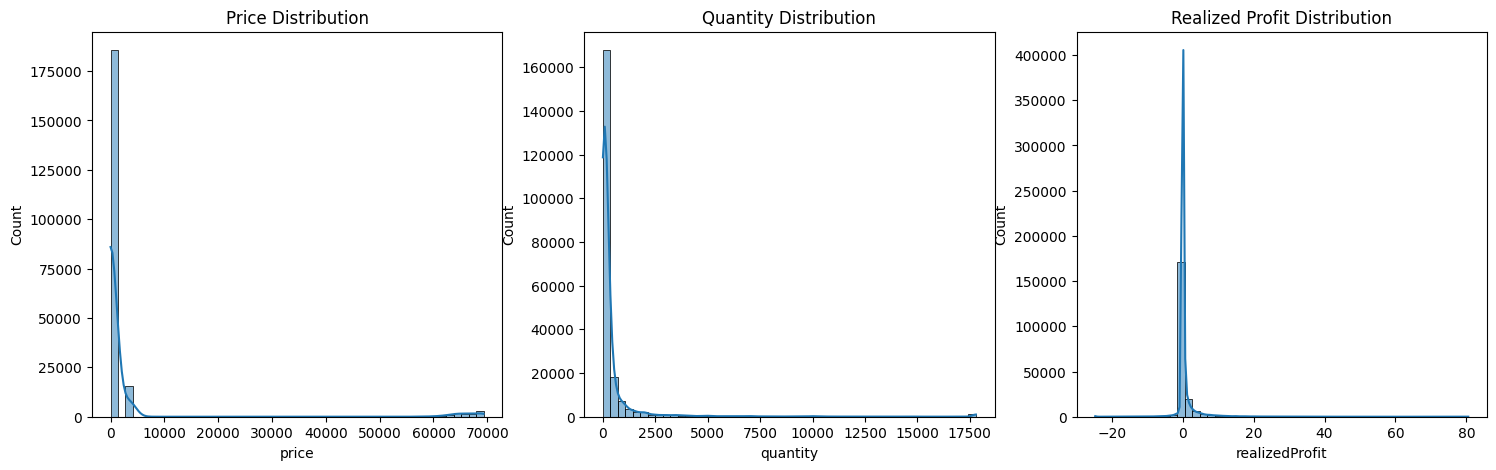

In [ ]:
# Plot distribution of price, quantity, and realized profit
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["price"], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Price Distribution")

sns.histplot(df["quantity"], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Quantity Distribution")

sns.histplot(df["realizedProfit"], bins=50, ax=axes[2], kde=True)
axes[2].set_title("Realized Profit Distribution")

plt.show()

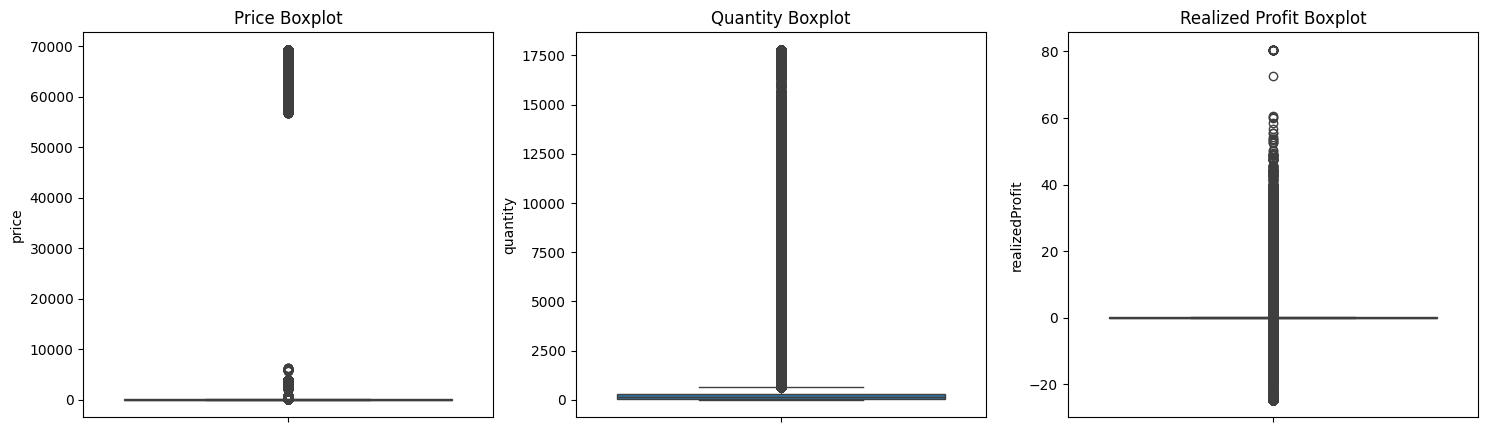

In [ ]:
# Boxplots to detect remaining outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=df["price"], ax=axes[0])
axes[0].set_title("Price Boxplot")

sns.boxplot(y=df["quantity"], ax=axes[1])
axes[1].set_title("Quantity Boxplot")

sns.boxplot(y=df["realizedProfit"], ax=axes[2])
axes[2].set_title("Realized Profit Boxplot")

plt.show()

#Calculating Different Matrics
- ROI (Return on Investment)
- PnL (Profit and Loss)
- Sharpe Ratio
- MDD (Maximum Drawdown)
- Win Rate
- Win Positions
- Total Positions

In the below sessions we're going to calculate the desired matrics as instructed

In [ ]:
# Group by Port_IDs and sum up relevant columns
df_grouped = df.groupby("Port_IDs").agg({
  "quantity": "sum",          # Total money invested per account
  "realizedProfit": "sum",    # Total profit per account
  "fee": "sum",               # Total fees per account
  "qty": "sum",               # Total coin quantity per account
  "time": ["min", "max"],     # Get first and last trade timestamps
  "symbol": "nunique",        # Count number of unique traded assets
  "side": "count"             # Total trade count (Total Positions)
}).reset_index()

# Rename columns for clarity
df_grouped.columns = ["Port_IDs", "Total_Quantity", "Total_Realized_Profit", "Total_Fee",
                      "Total_Qty", "First_Trade", "Last_Trade", "Unique_Assets", "Total_Positions"]
df_grouped.head()

,Port_IDs,Total_Quantity,Total_Realized_Profit,Total_Fee,Total_Qty,First_Trade,Last_Trade,Unique_Assets,Total_Positions
0,3672754654734989568,1.189369e+05,566.597660,-35.702034,1.524255e+07,2024-04-22 19:33:57,2024-06-21 16:04:43,31,474
1,3733192481840423936,1.164472e+06,2923.977200,-461.702516,3.439270e+03,2024-04-24 15:42:40,2024-06-18 21:20:05,2,689
2,3768170840939476993,2.775560e+03,243.668899,-1.088175,5.617972e+04,2024-06-16 14:57:55,2024-06-21 13:43:15,2,14
3,3784403294629753856,7.421060e+05,2521.814305,-359.482814,1.557960e+07,2024-05-07 18:54:39,2024-06-21 14:24:39,70,6050
4,3786761687746711808,6.174001e+04,205.021400,-29.166650,2.741620e+03,2024-04-24 05:04:38,2024-06-21 13:48:59,7,82


In [ ]:
# Calculate trading duration (in hours)
df_grouped["Trading_Duration_Hours"] = (df_grouped["Last_Trade"] - df_grouped["First_Trade"]).dt.total_seconds() / 3600

# Calculate average trade frequency (trades per hour)
df_grouped["Avg_Trades_per_Hour"] = df_grouped["Total_Positions"] / df_grouped["Trading_Duration_Hours"]

In [ ]:
df_grouped.head()

,Port_IDs,Total_Quantity,Total_Realized_Profit,Total_Fee,Total_Qty,First_Trade,Last_Trade,Unique_Assets,Total_Positions,Trading_Duration_Hours,Avg_Trades_per_Hour
0,3672754654734989568,1.189369e+05,566.597660,-35.702034,1.524255e+07,2024-04-22 19:33:57,2024-06-21 16:04:43,31,474,1436.512778,0.329966
1,3733192481840423936,1.164472e+06,2923.977200,-461.702516,3.439270e+03,2024-04-24 15:42:40,2024-06-18 21:20:05,2,689,1325.623611,0.519755
2,3768170840939476993,2.775560e+03,243.668899,-1.088175,5.617972e+04,2024-06-16 14:57:55,2024-06-21 13:43:15,2,14,118.755556,0.117889
3,3784403294629753856,7.421060e+05,2521.814305,-359.482814,1.557960e+07,2024-05-07 18:54:39,2024-06-21 14:24:39,70,6050,1075.500000,5.625291
4,3786761687746711808,6.174001e+04,205.021400,-29.166650,2.741620e+03,2024-04-24 05:04:38,2024-06-21 13:48:59,7,82,1400.739167,0.058541


In [ ]:
len(df_grouped)

150

##ROI(Return on Investment)
ROI can we calculate by:
### ROI (Return on Investment)
**Formula:**

ROI=(
Total Quantity Invested/Total Realized Profit
​
 )×100

- **Total Realized Profit** = Sum of `realizedProfit`
- **Total Quantity Invested** = Sum of `quantity` for **BUY** trades


In [ ]:
df_grouped.columns

Index(['Port_IDs', 'Total_Quantity', 'Total_Realized_Profit', 'Total_Fee',
       'Total_Qty', 'First_Trade', 'Last_Trade', 'Unique_Assets',
       'Total_Positions', 'Trading_Duration_Hours', 'Avg_Trades_per_Hour'],
      dtype='object')

In [ ]:
# Define a small epsilon to replace zeroes
epsilon = 1e-6  # Small value to avoid divide-by-zero errors

# Replace 0 in PnL with epsilon before calculating ROI
df_grouped["Total_Realized_Profit"] = df_grouped["Total_Realized_Profit"].replace(0, epsilon)

In [ ]:
df_grouped["ROI"] = (df_grouped["Total_Quantity"]/df_grouped["Total_Realized_Profit"])*100
df_grouped["ROI"].head(10)

,ROI
0,20991.423429
1,39824.951393
2,1139.070339
3,29427.464134
4,30113.934108
5,11950.195806
6,12670.921868
7,14496.602016
8,821.118008
9,-280237.929878


In [ ]:
df_grouped.tail(2)["Total_Realized_Profit"]

,Total_Realized_Profit
148,-776.343
149,2327.336


##PnL(Profit and Loss)
Pnl can be calculated by:

### PnL (Profit and Loss)
**Formula:**

PnL=∑(realizedProfit)


- Sum of all realized profits/losses from trades.
- Positive = profit, Negative = loss.


In [ ]:
df_grouped.columns

Index(['Port_IDs', 'Total_Quantity', 'Total_Realized_Profit', 'Total_Fee',
       'Total_Qty', 'First_Trade', 'Last_Trade', 'Unique_Assets',
       'Total_Positions', 'Trading_Duration_Hours', 'Avg_Trades_per_Hour',
       'ROI'],
      dtype='object')

In [ ]:
df_grouped.rename(columns={"Total_Realized_Profit":"PnL"},inplace=True)

In [ ]:
df_grouped["PnL"]

,PnL
0,566.597660
1,2923.977200
2,243.668899
3,2521.814305
4,205.021400
...,...
145,1038.807419
146,0.000001
147,2151.704060
148,-776.343000


##Sharpe Ratio
We can calculate Sharpe Ratio using:
Formula:

Sharpe Ratio = (𝐸[𝑟−𝑅𝑓])/𝜎𝑟

Where:

- r = Returns from trades (percentage change per trade)

- 𝑅𝑓 = Risk-free rate (assume 0% if unavailable)

- 𝜎𝑟 = Standard deviation of returns

How to Calculate:

Calculate percentage return per trade:

𝑟 = (realizedProfit)/quantity

- Compute average return 𝐸[𝑟]

- Compute standard deviation 𝜎𝑟

- Plug into formula

In [ ]:
# Assumption: Risk-free rate (Rf) = 0%
df_grouped["Mean_Return"] = df_grouped["PnL"] / df_grouped["Total_Quantity"]
df_grouped["Std_Dev_Return"] = df_grouped["Mean_Return"].std()  # Standard deviation of returns
df_grouped["Sharpe_Ratio"] = df_grouped["Mean_Return"] / df_grouped["Std_Dev_Return"]

##MDD(Maxium Drawdown)
We can calculate MDD by:

Formula:

𝑀𝐷𝐷 = [(max⁡(Cumulative Equity) − min⁡(Cumulative Equity))/max(Cumulative Equity)]*100

How to Calculate:

- Compute cumulative profit/loss per trade
- Track max equity value at any point
- Find largest drop from peak to low

In [ ]:
df_grouped["Sharpe_Ratio"]

,Sharpe_Ratio
0,3.240670e-01
1,1.708132e-01
2,5.972087e+00
3,2.311659e-01
4,2.258963e-01
...,...
145,6.952973e-01
146,3.477927e-09
147,6.704149e-01
148,-9.135033e-02


In [ ]:
# Calculate cumulative profit
df_grouped["Cumulative_Profit"] = df_grouped["PnL"].cumsum()

# Calculate Maximum Drawdown
df_grouped["Max_Cumulative_Profit"] = df_grouped["Cumulative_Profit"].cummax()
df_grouped["Drawdown"] = df_grouped["Max_Cumulative_Profit"] - df_grouped["Cumulative_Profit"]
df_grouped["Max_Drawdown (%)"] = (df_grouped["Drawdown"] / df_grouped["Max_Cumulative_Profit"]) * 100

In [ ]:
df_grouped.columns

Index(['Port_IDs', 'Total_Quantity', 'PnL', 'Total_Fee', 'Total_Qty',
       'First_Trade', 'Last_Trade', 'Unique_Assets', 'Total_Positions',
       'Trading_Duration_Hours', 'Avg_Trades_per_Hour', 'ROI', 'Mean_Return',
       'Std_Dev_Return', 'Sharpe_Ratio', 'Cumulative_Profit',
       'Max_Cumulative_Profit', 'Drawdown', 'Max_Drawdown (%)'],
      dtype='object')

##Win Rate and Positions
Formula:
Formula:

Win Rate = (Win Positions/Total Positions)*100

How to Calculate:

- Win Positions = Count of trades where realizedProfit > 0
- Total Positions = Total number of trades

Win Positions = ∑1(realizedProfit>0)

How to Calculate:

- Count the number of trades where realizedProfit > 0

In [ ]:
df.groupby("Port_IDs")["realizedProfit"].apply(lambda x: (x > 0).sum()).reset_index()["realizedProfit"]

,realizedProfit
0,210
1,553
2,6
3,1829
4,37
...,...
145,181
146,0
147,19
148,85


In [ ]:
# Win Positions & Win Rate Calculation
df_grouped["Win_Positions"] = df.groupby("Port_IDs")["realizedProfit"].apply(lambda x: (x > 0).sum()).reset_index()["realizedProfit"]
df_grouped["Win_Rate (%)"] = (df_grouped["Win_Positions"] / df_grouped["Total_Positions"]) * 100

In [ ]:
df_grouped.loc[:,["Win_Positions","Win_Rate (%)"]]

,Win_Positions,Win_Rate (%)
0,210,44.303797
1,553,80.261248
2,6,42.857143
3,1829,30.231405
4,37,45.121951
...,...,...
145,181,55.351682
146,0,0.000000
147,19,32.203390
148,85,23.097826


##Total Position
Formula:

Total Positions = Count of All trades

How to Calculate:

- Count total number of trades

In [ ]:
df.groupby(["Port_IDs", "side"])["side"].count().unstack(fill_value=0).reset_index()["BUY"]

,BUY
0,266
1,129
2,6
3,2767
4,45
...,...
145,146
146,76
147,21
148,224


In [ ]:
# Count total trades per Port_IDs (Total Positions)
df_grouped["Total_Positions"] = df.groupby("Port_IDs")["side"].count().reset_index()["side"]
df_grouped["Total_Buy_Positions"] = df.groupby(["Port_IDs", "side"])["side"].count().unstack(fill_value=0).reset_index()["BUY"]
df_grouped["Total_Sell_Positions"] = df.groupby(["Port_IDs", "side"])["side"].count().unstack(fill_value=0).reset_index()["SELL"]
df_grouped["Net_Positions"] = df_grouped["Total_Buy_Positions"] - df_grouped["Total_Sell_Positions"]

In [ ]:
df_grouped[["Total_Positions","Total_Buy_Positions","Total_Sell_Positions","Net_Positions"]]

,Total_Positions,Total_Buy_Positions,Total_Sell_Positions,Net_Positions
0,474,266,208,58
1,689,129,560,-431
2,14,6,8,-2
3,6050,2767,3283,-516
4,82,45,37,8
...,...,...,...,...
145,327,146,181,-35
146,76,76,0,76
147,59,21,38,-17
148,368,224,144,80


##Saving The Metrics DataFrame to CSV

In [ ]:
#Path to Metric DataFrame
metrics_csv = data_dir/"Metrics_DataFrame.csv"
#Saving the dataframe to the path
df_grouped.to_csv(metrics_csv)

#Ranking Trades
Now we're going to rank the trades from top best trades to worst trade using 3 different methodology.
1. Weight Score Method
2. Z-Score Normalization Method
3. Machine Learning Approach

##Weight Score Method
This is a multi-metric ranking approach that assigns weights to different parameters and calculates a final score for each trader.

Formula for Ranking Score

    Trade Score = (𝑤1 × 𝑅𝑂𝐼)+(𝑤2 × 𝑃𝑛𝐿)+(𝑤3 × 𝑆ℎ𝑎𝑟𝑝𝑒𝑅𝑎𝑡𝑖𝑜)+(𝑤4 × 𝑊𝑖𝑛𝑅𝑎𝑡𝑒)+(𝑤5 × 𝑇𝑟𝑎𝑑𝑒𝐴𝑐𝑡𝑖𝑣𝑖𝑡𝑦)

Where:

- 𝑤1, 𝑤2, 𝑤3, 𝑤4, 𝑤5 are weights assigned to each metric.
- Higher weights mean that metric is more important.
- The sum of all weights should be 1.0 (100%).

In [ ]:
df_grouped.columns

Index(['Port_IDs', 'Total_Quantity', 'PnL', 'Total_Fee', 'Total_Qty',
       'First_Trade', 'Last_Trade', 'Unique_Assets', 'Total_Positions',
       'Trading_Duration_Hours', 'Avg_Trades_per_Hour', 'ROI', 'Mean_Return',
       'Std_Dev_Return', 'Sharpe_Ratio', 'Cumulative_Profit',
       'Max_Cumulative_Profit', 'Drawdown', 'Max_Drawdown (%)',
       'Win_Positions', 'Win_Rate (%)', 'Total_Buy_Positions',
       'Total_Sell_Positions', 'Net_Positions'],
      dtype='object')

In [ ]:
# Define Weights for Ranking (adjust based on importance)
weights = {
    "ROI": 0.2,            # Profitability
    "PnL": 0.2,            # Overall profit/loss
    "Sharpe_Ratio": 0.2,   # Risk-adjusted returns
    "Win_Rate": 0.2,       # Consistency
    "Total_Positions": 0.1, # Activity level
    "Net_Positions": 0.1
}

In [ ]:
# Normalize Metrics (convert to range 0-1 for fair comparison)
df_grouped["ROI_Norm"] = df_grouped["ROI"] / df_grouped["ROI"].max()
df_grouped["PnL_Norm"] = df_grouped["PnL"] / df_grouped["PnL"].max()
df_grouped["Sharpe_Norm"] = df_grouped["Sharpe_Ratio"] / df_grouped["Sharpe_Ratio"].max()
df_grouped["WinRate_Norm"] = df_grouped["Win_Rate (%)"] / df_grouped["Win_Rate (%)"].max()
df_grouped["Positions_Norm"] = df_grouped["Total_Positions"] / df_grouped["Total_Positions"].max()
df_grouped["Net_Positions_Norm"] = df_grouped["Net_Positions"] / df_grouped["Net_Positions"].max()


# Calculate Final Trade Score
df_grouped["Trade_Weight_Score"] = (
    weights["ROI"] * df_grouped["ROI_Norm"] +
    weights["PnL"] * df_grouped["PnL_Norm"] +
    weights["Sharpe_Ratio"] * df_grouped["Sharpe_Norm"] +
    weights["Win_Rate"] * df_grouped["WinRate_Norm"] +
    weights["Total_Positions"] * df_grouped["Positions_Norm"] +
    weights["Net_Positions"] * df_grouped["Net_Positions_Norm"]
)

In [ ]:
# Rank Traders Based on Trade Score
df_grouped = df_grouped.sort_values(by="Trade_Weight_Score", ascending=False).reset_index(drop=True)

In [ ]:
Weight_Score = [list(df_grouped.head(20)["Port_IDs"]),list(df_grouped.head(20)["Trade_Weight_Score"])]
Weight_Score

[[3986814617275053313,
  4020204877254599680,
  3999240873283311617,
  3907081197088384000,
  3826087012661391104,
  4022641794255717633,
  3768170840939476993,
  3887577207880438784,
  3931992636670880512,
  3788465932399412480,
  3878631538480067329,
  3886752488982104320,
  3942630767220672256,
  3944088772635000577,
  3956076827719377409,
  3966142151544441601,
  4000877324693233921,
  3960874214179953664,
  3987739404272887297,
  4011626972687000576],
 [0.41302045265087695,
  0.38890960215587744,
  0.3556552905850317,
  0.35276295955225057,
  0.3523346208875954,
  0.2566656928000992,
  0.2517543681180052,
  0.2450255130084349,
  0.24059063144145454,
  0.23950448914300132,
  0.23578261057725192,
  0.23556407717123246,
  0.2227381596704973,
  0.21963868577406426,
  0.21920613279658996,
  0.2156695992569675,
  0.21474256035306197,
  0.21403611580034348,
  0.21076138877728795,
  0.20902786906388907]]

##Z-Score Method
Instead of scaling from 0-1, normalize using Z-Score:

    𝑍 = (𝑋 − 𝜇)/𝜎

where μ is the mean and 𝜎 is the standard deviation.

In [ ]:
# Apply Z-Score Normalization to all ranking metrics
df_grouped["ROI_Z"] = zscore(df_grouped["ROI"])
df_grouped["PnL_Z"] = zscore(df_grouped["PnL"])
df_grouped["Sharpe_Z"] = zscore(df_grouped["Sharpe_Ratio"])
df_grouped["WinRate_Z"] = zscore(df_grouped["Win_Rate (%)"])
df_grouped["Positions_Z"] = zscore(df_grouped["Total_Positions"])
df_grouped["Net_Positions_Z"] = zscore(df_grouped["Net_Positions"])

In [ ]:
# Define Weights for Ranking
weights = {
    "ROI_Z": 0.2,
    "PnL_Z": 0.2,
    "Sharpe_Z": 0.2,
    "WinRate_Z": 0.2,
    "Positions_Z": 0.1,
    "Net_Positions_Z" : 0.1
}

In [ ]:
# Compute Trade Score using Weighted Z-Scores
df_grouped["Trade_Z_Score"] = (
    weights["ROI_Z"] * df_grouped["ROI_Z"] +
    weights["PnL_Z"] * df_grouped["PnL_Z"] +
    weights["Sharpe_Z"] * df_grouped["Sharpe_Z"] +
    weights["WinRate_Z"] * df_grouped["WinRate_Z"] +
    weights["Positions_Z"] * df_grouped["Positions_Z"] +
    weights["Net_Positions_Z"] * df_grouped["Net_Positions_Z"]
)

In [ ]:
# Rank Traders Based on Trade Score
df_grouped = df_grouped.sort_values(by="Trade_Z_Score", ascending=False).reset_index(drop=True)

In [ ]:
Z_Score = [list(df_grouped.head(20)["Port_IDs"]),list(df_grouped.head(20)["Trade_Z_Score"])]
Z_Score

[[4020204877254599680,
  4040382575336130560,
  3826087012661391104,
  3986814617275053313,
  3999240873283311617,
  3907081197088384000,
  3768170840939476993,
  3788465932399412480,
  3886752488982104320,
  4028701921959171840,
  4022641794255717633,
  3878631538480067329,
  3960874214179953664,
  4021669203289716224,
  3931992636670880512,
  3956076827719377409,
  3966142151544441601,
  3891020560590657281,
  3887577207880438784,
  3977234346014419201],
 [1.831849826667705,
  1.6398104790347878,
  1.630386272641945,
  1.6027693175302278,
  1.4241823608307012,
  1.236680145278482,
  0.9217684081500315,
  0.5538166546190975,
  0.47708010179489335,
  0.44810006022651644,
  0.44271206184910905,
  0.4423114016242511,
  0.41791936117951695,
  0.4000539882253291,
  0.37124954169487123,
  0.3638301632104232,
  0.3499657525868979,
  0.3277378512195576,
  0.30925980029426237,
  0.2987297017274514]]

##Machine Learning Apporach

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df_grouped.describe().T

,count,mean,min,25%,50%,75%,max,std
Port_IDs,150.0,3975655301635810304.0,3672754654734989312.0,3943672393451930112.0,3998616058635801088.0,4029507528877688320.0,4041860229502600192.0,68874698500307128.0
Total_Quantity,150.0,1374021.144351,454.6,160653.091313,592868.045405,1621740.839805,23109085.43844,2541400.006573
PnL,150.0,4606.991038,-12346.682219,1753.432624,2683.547936,4725.862074,71998.855953,7747.263831
Total_Fee,150.0,-539.160732,-11348.297509,-587.802444,-214.217454,-66.19782,-0.09092,1123.609074
Total_Qty,150.0,15361679.324353,2.2,4964.1525,753444.744,6903324.9785,458790843.6,57512287.967711
First_Trade,150,2024-05-21 12:52:04.640000,2024-04-22 16:48:03,2024-04-25 02:31:58,2024-05-24 22:23:23,2024-06-12 14:35:22.750000128,2024-06-20 08:28:42,NaN
Last_Trade,150,2024-06-19 08:07:48.266666496,2024-04-27 01:04:54,2024-06-20 13:30:44.750000128,2024-06-21 11:57:11,2024-06-21 14:58:41.249999872,2024-06-21 17:11:45,NaN
Unique_Assets,150.0,15.493333,1.0,2.0,6.0,18.75,148.0,23.190992
Total_Positions,150.0,1408.52,1.0,154.75,528.0,1706.75,6085.0,1876.051332
Trading_Duration_Hours,150.0,691.262119,0.0,199.874028,575.949861,1300.405347,1438.8325,520.568464


###Splitting the data

In [ ]:
# Define Features (X) and Target (y)
features = [
    'Total_Quantity', 'PnL', 'Total_Fee', 'Total_Qty', 'Unique_Assets',
    'Total_Positions', 'ROI', 'Mean_Return', 'Std_Dev_Return', 'Sharpe_Ratio',
    'Cumulative_Profit', 'Max_Cumulative_Profit', 'Drawdown', 'Max_Drawdown (%)',
    'Win_Positions', 'Win_Rate (%)', 'Total_Buy_Positions', 'Total_Sell_Positions',
    'Net_Positions', 'ROI_Norm', 'PnL_Norm', 'Sharpe_Norm', 'WinRate_Norm',
    'Positions_Norm', 'Net_Positions_Norm', 'Trade_Weight_Score', 'ROI_Z',
    'PnL_Z', 'Sharpe_Z', 'WinRate_Z', 'Positions_Z', 'Net_Positions_Z',
    'Trade_Z_Score'
]

In [ ]:
X = df_grouped[features]
y = df_grouped["Trade_Weight_Score"]  # Target variable

In [ ]:
# Handle missing values (replace NaN with 0)
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

<ipython-input-52-48e271ab7014>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [ ]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features for better ML performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###RandomForest MODEL

In [ ]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf

array([0.14350261, 0.23552512, 0.0994283 , 0.16802632, 0.13440563,
       0.1687501 , 0.16009122, 0.07460465, 0.18350235, 0.12276766,
       0.08021352, 0.22039765, 0.15876542, 0.2081392 , 0.17564125,
       0.14988465, 0.08646756, 0.14375521, 0.13287223, 0.08448482,
       0.19785263, 0.08447442, 0.16799028, 0.07129192, 0.0853608 ,
       0.06143647, 0.10574515, 0.08417227, 0.1609767 , 0.19257926])

In [ ]:
r2_score(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_rf)

(0.9969255716180916, 0.0018525365303785717)

In [ ]:
df_grouped["Trade_ML_Score"] = rf_model.predict(X)
df_grouped = df_grouped.sort_values(by="Trade_ML_Score", ascending=False).reset_index(drop=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
ML_Score = [list(df_grouped.head(20)["Port_IDs"]),list(df_grouped.head(20)["Trade_ML_Score"])]
ML_Score

[[4020204877254599680,
  3986814617275053313,
  3999240873283311617,
  3907081197088384000,
  3826087012661391104,
  3788465932399412480,
  4022641794255717633,
  3956076827719377409,
  3960874214179953664,
  3768170840939476993,
  3887577207880438784,
  4028701921959171840,
  3931992636670880512,
  3878631538480067329,
  3886752488982104320,
  3942630767220672256,
  3966142151544441601,
  3987739404272887297,
  3944088772635000577,
  4022565861939831809],
 [0.18384178938825188,
  0.1823151919153654,
  0.18161174427329474,
  0.17690196083566614,
  0.17456446065277048,
  0.16959721877223444,
  0.16865512243654593,
  0.16807239615046124,
  0.16785281630420454,
  0.16769639105221423,
  0.1672847883119859,
  0.16720243248881467,
  0.16695356253087407,
  0.16630656275973835,
  0.16629864836870736,
  0.16607865242571748,
  0.16568716796402552,
  0.16562849758831205,
  0.16559395537680238,
  0.16542233681481286]]

##Results
Now we will build up a result dataframe from the different results we got from the different approach we followed:

1. Weight Score Approach
2. Z-Score Approach
3. Machine Learning Approach

In [ ]:
#Results Dictionary
results = {
    "Rank": range(1,21),
    "WS_Ranking": Weight_Score[0],
    "Weight_Score": Weight_Score[1],
    "ZS_Ranking":Z_Score[0],
    "Z-Score":Z_Score[1],
    "ML_Ranking":ML_Score[0],
    "Machine_Learning":ML_Score[1]
}

results_df = pd.DataFrame.from_dict(results).set_index("Rank")
results_df.head(20)

,WS_Ranking,Weight_Score,ZS_Ranking,Z-Score,ML_Ranking,Machine_Learning
Rank,,,,,,
1,3986814617275053313,0.413020,4020204877254599680,1.831850,4020204877254599680,0.183842
2,4020204877254599680,0.388910,4040382575336130560,1.639810,3986814617275053313,0.182315
3,3999240873283311617,0.355655,3826087012661391104,1.630386,3999240873283311617,0.181612
4,3907081197088384000,0.352763,3986814617275053313,1.602769,3907081197088384000,0.176902
5,3826087012661391104,0.352335,3999240873283311617,1.424182,3826087012661391104,0.174564
6,4022641794255717633,0.256666,3907081197088384000,1.236680,3788465932399412480,0.169597
7,3768170840939476993,0.251754,3768170840939476993,0.921768,4022641794255717633,0.168655
8,3887577207880438784,0.245026,3788465932399412480,0.553817,3956076827719377409,0.168072
9,3931992636670880512,0.240591,3886752488982104320,0.477080,3960874214179953664,0.167853
